<a href="https://colab.research.google.com/github/AIceDog/Pyotrch-Notes/blob/master/torch_einsum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [15]:
queries = torch.randint(10, (3, 2, 5, 4)) # [B, head_num, L, D] 
print(queries)

tensor([[[[3, 1, 6, 1],
          [7, 7, 8, 4],
          [4, 2, 3, 5],
          [2, 8, 4, 7],
          [4, 1, 4, 2]],

         [[5, 5, 5, 4],
          [6, 4, 0, 1],
          [6, 6, 5, 7],
          [0, 6, 2, 6],
          [2, 6, 3, 5]]],


        [[[4, 5, 4, 8],
          [5, 7, 4, 1],
          [8, 2, 7, 7],
          [5, 3, 8, 2],
          [8, 1, 9, 8]],

         [[6, 9, 4, 7],
          [2, 0, 6, 8],
          [3, 9, 7, 8],
          [9, 6, 8, 0],
          [0, 3, 2, 0]]],


        [[[2, 4, 8, 3],
          [0, 9, 2, 1],
          [9, 5, 5, 8],
          [5, 8, 1, 7],
          [7, 3, 1, 9]],

         [[0, 4, 1, 8],
          [2, 3, 8, 4],
          [1, 6, 3, 2],
          [7, 9, 1, 2],
          [0, 2, 7, 1]]]])


In [16]:
keys = torch.randint(10, (3, 2, 5, 4)) # [B, head_num, L, D] 
print(keys)

tensor([[[[6, 8, 9, 1],
          [3, 7, 6, 3],
          [8, 5, 0, 1],
          [6, 5, 6, 2],
          [5, 6, 8, 9]],

         [[2, 4, 9, 6],
          [6, 2, 7, 1],
          [1, 6, 9, 2],
          [8, 7, 0, 0],
          [8, 5, 3, 8]]],


        [[[0, 0, 6, 5],
          [2, 3, 2, 9],
          [0, 5, 1, 4],
          [0, 5, 8, 3],
          [7, 9, 4, 5]],

         [[4, 9, 0, 3],
          [3, 8, 2, 9],
          [4, 6, 1, 4],
          [5, 1, 2, 5],
          [2, 1, 2, 8]]],


        [[[2, 3, 8, 4],
          [7, 4, 6, 7],
          [3, 9, 6, 8],
          [9, 3, 3, 3],
          [1, 2, 4, 4]],

         [[7, 0, 9, 3],
          [0, 6, 3, 5],
          [4, 5, 8, 3],
          [7, 9, 9, 2],
          [6, 8, 7, 2]]]])


In [17]:
print("keys.sum(dim=2) : ")
print(keys.sum(dim=2), '\n')
print("keys.sum(dim=2).shape : ")
print(keys.sum(dim=2).shape)

keys.sum(dim=2) : 
tensor([[[28, 31, 29, 16],
         [25, 24, 28, 17]],

        [[ 9, 22, 21, 26],
         [18, 25,  7, 29]],

        [[22, 21, 27, 26],
         [24, 28, 36, 15]]]) 

keys.sum(dim=2).shape : 
torch.Size([3, 2, 4])


In [18]:
torch.einsum("bhld,bhd->bhl", queries, keys.sum(dim=2))

tensor([[[305, 709, 341, 532, 291],
         [453, 263, 553, 302, 363]],

        [[438, 309, 445, 331, 491],
         [564, 310, 560, 368,  89]],

        [[422, 269, 646, 487, 478],
         [268, 480, 330, 486, 323]]])

In [24]:
a = np.array([[3, 1, 6, 1],
              [7, 7, 8, 4],
              [4, 2, 3, 5],
              [2, 8, 4, 7],
              [4, 1, 4, 2]])
b = np.array([28, 31, 29, 16])
print("a(matrix) * b(column_vector) :")
print(np.dot(a, b))

a(matrix) * b(column_vector) :
[305 709 341 532 291]


In [25]:
print(3 * 28 + 1 * 31 + 6 * 29 + 1 * 16)

305


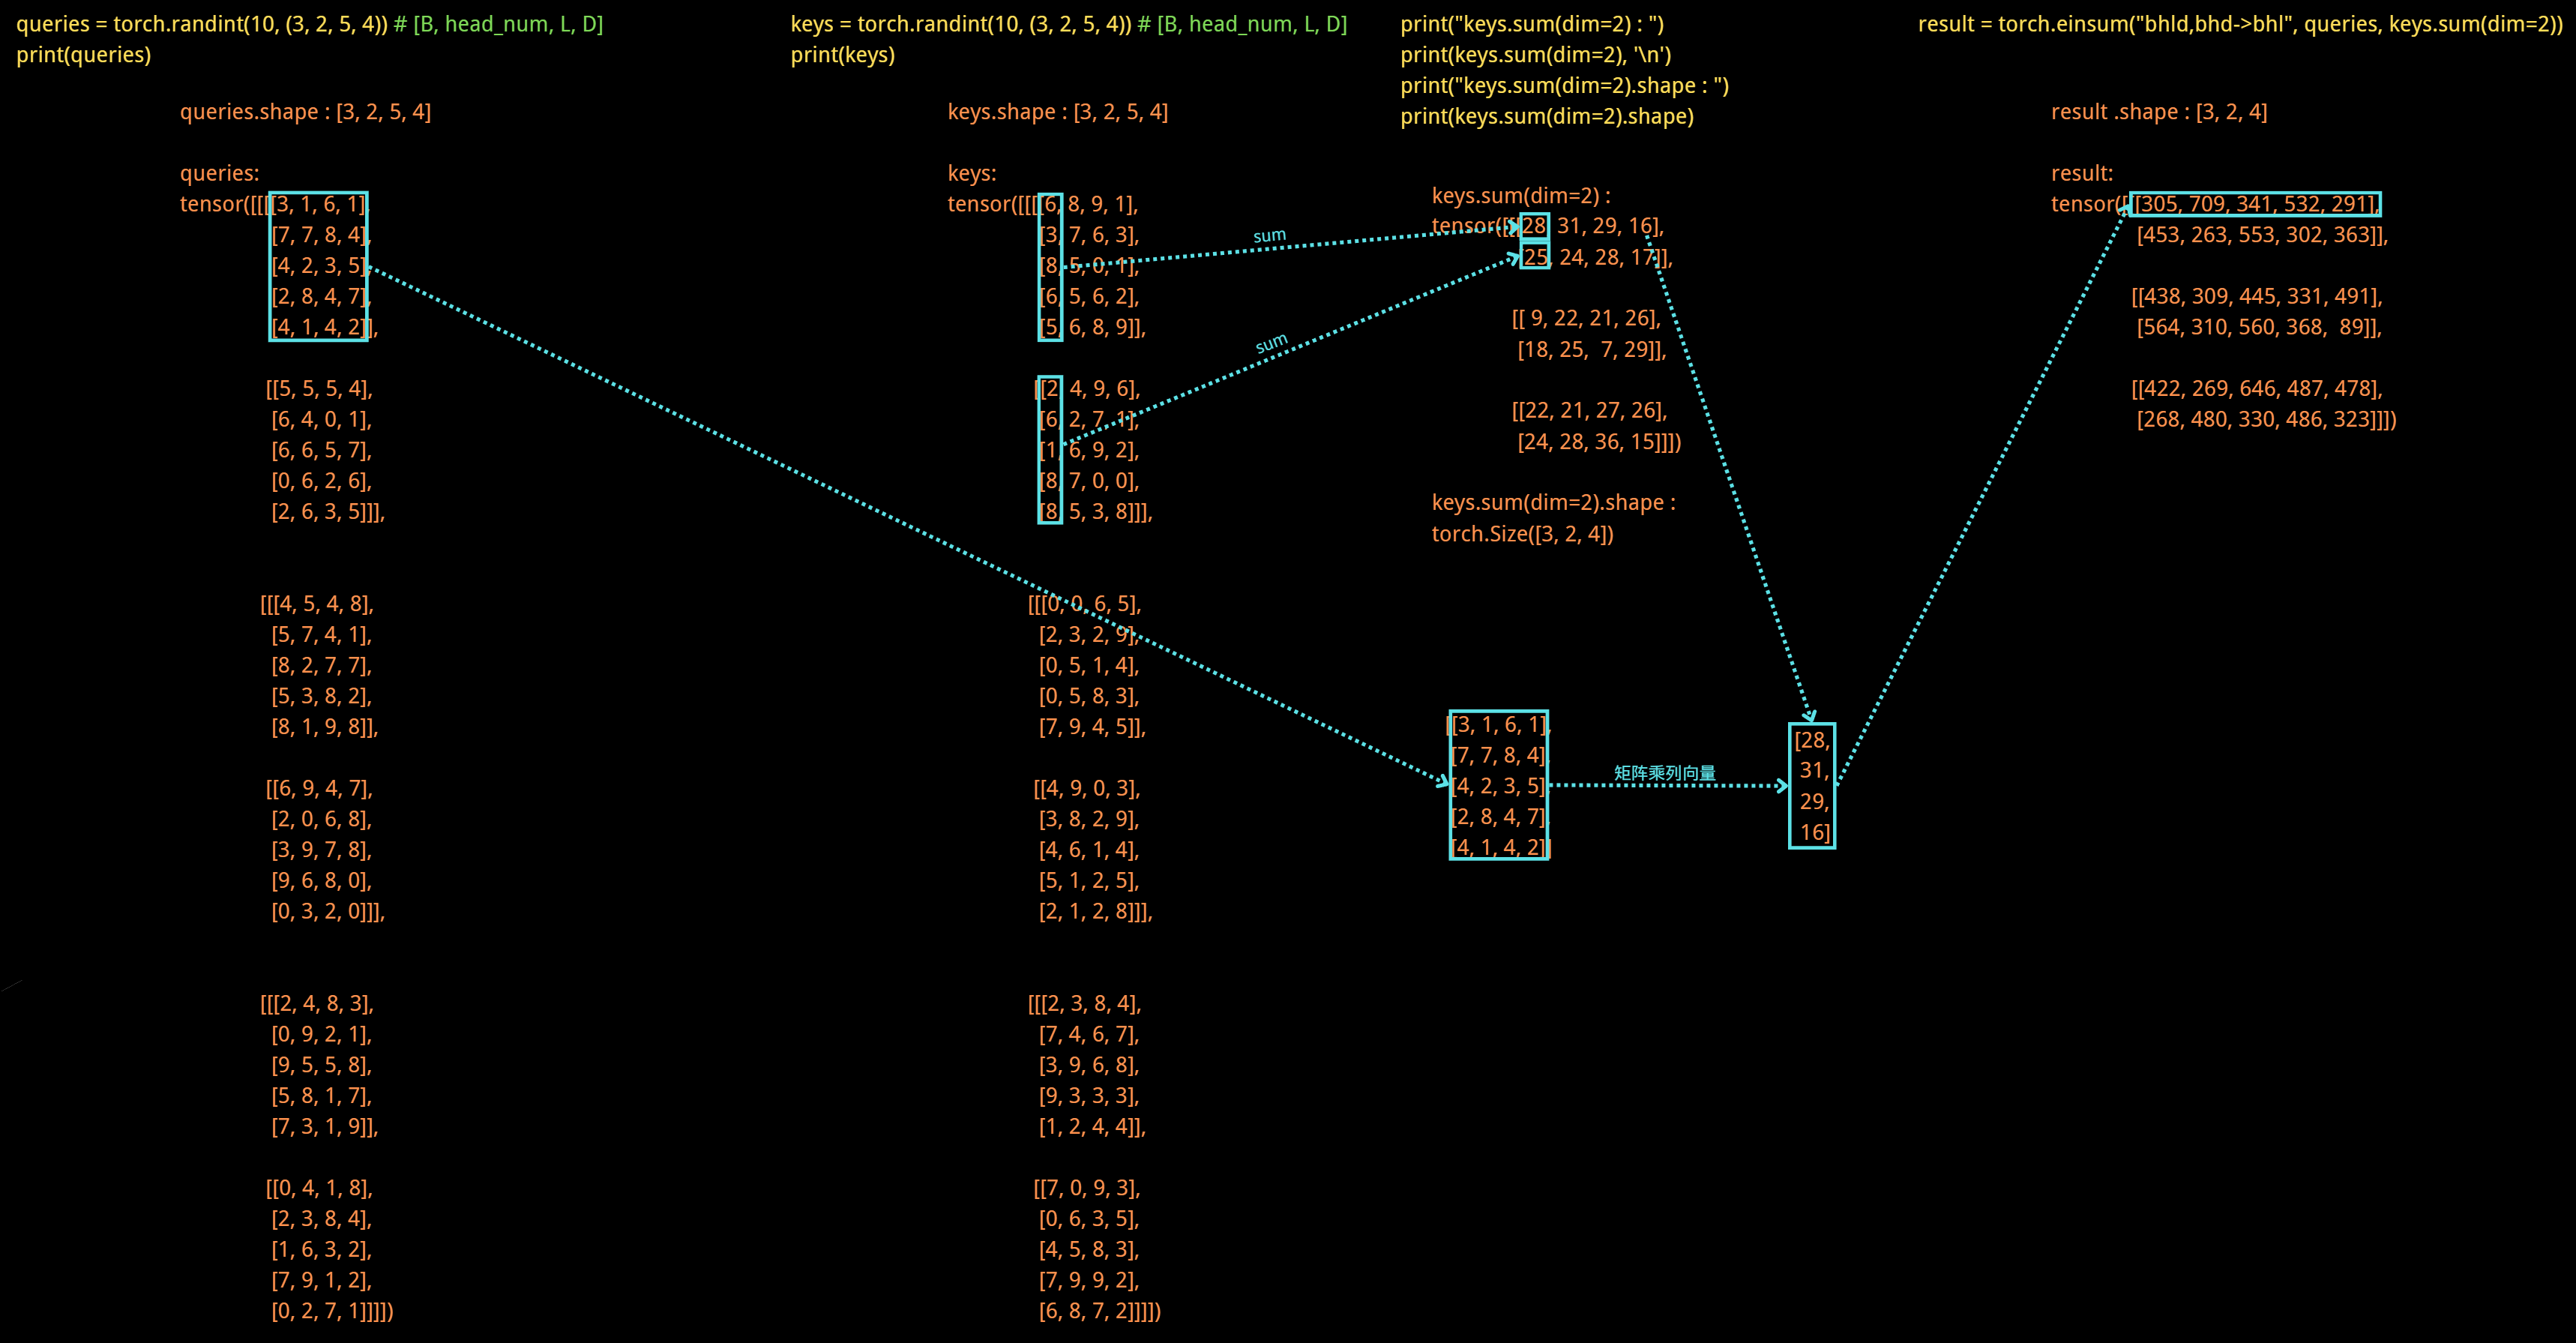